# FASHION MNIST -CNN

In [1]:
# 1. Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
# from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, models
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import os


from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.optimizers.schedules import ExponentialDecay

2025-06-01 18:12:51.455754: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 18:12:52.201570: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-06-01 18:12:52.207127: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-06-01 18:12:54.963076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Invalid MIT-MAGIC-COOKIE-1 key

In [2]:
# 2. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [3]:
print(fashion_mnist)
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape',  x_test.shape)
print('y_test shape',  y_test.shape)

print(f"Number of classes: {len(np.unique(y_train))}")
print("Classes:", np.unique(y_train))
clothes_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(clothes_names)

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/home/akashs/.local/lib/python3.8/site-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)
Number of classes: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

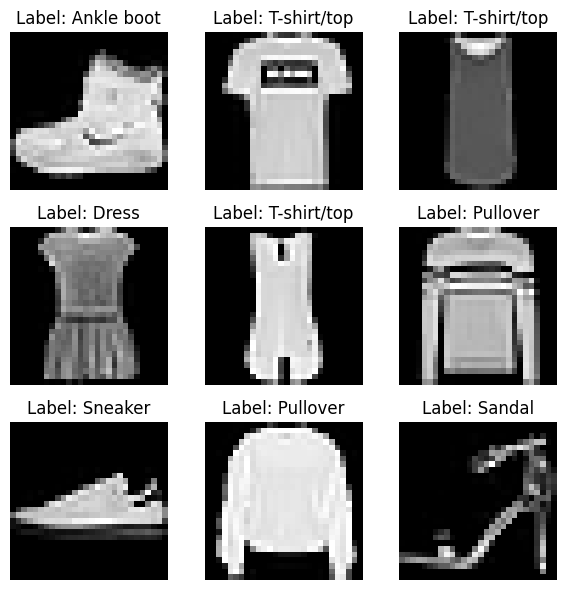

In [5]:

# 3. Display some sample images from the training dataset
plt.figure(figsize=(6, 6))
for i in range(9):
    # for j in clothes_names:
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i], cmap='gray') # rainbow
    plt.title(f"Label: {clothes_names[y_train[i]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [6]:
# 4. Preprocess the data: normalize
# 0 (black) → 255 (white or full intensity)
x_train_norm = x_train.astype('float32') / 255.0 # 255 is the max pixel value in an 8-bit grayscale image
x_test_norm  = x_test.astype('float32') / 255.0


In [7]:
# 5. Build the neural network model
model = models.Sequential([
    layers.Conv2D(25, (10, 10), activation='relu', padding='same', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(90, (10, 10), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(200, (10, 10), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    
    # layers.Flatten(input_shape=(32, 32, 3)), # Automatically flattens from (32, 32, 3) 
    layers.Dense(512, activation='relu'),#, kernel_regularizer=l1(0.001)),BatchNormalization(),
    layers.Dense(256, activation='relu'),#, kernel_regularizer=l2(0.001)),BatchNormalization(),
    layers.Dense(128, activation='relu'),#, kernel_regularizer=l2(0.001)),BatchNormalization(),
    layers.Dense(64, activation='relu'),#, kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),BatchNormalization(),
    layers.Dense(10, activation='softmax') # Here, number of class labels = 10, so output layers should be 10
])

2025-06-01 18:13:05.211691: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2025-06-01 18:13:05.215303: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [8]:
# 6. Compile the model
# from tensorflow.keras.optimizers import Adam, SGD
model.compile(optimizer='adam', #'adam', #Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
%%time

# 7. Train the model
# model.fit(x_train_norm, y_train, epochs=10, validation_data=(x_test_norm, y_test))
model_fit = model.fit(x_train_norm, y_train, epochs=20, batch_size=64, validation_data=(x_test_norm, y_test))


2025-06-01 18:13:06.127011: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/20
938/938 [==============================] - 1128s 1s/step - loss: 0.5087 - accuracy: 0.8108 - val_loss: 0.4023 - val_accuracy: 0.8574
Epoch 2/20
938/938 [==============================] - 1173s 1s/step - loss: 0.3046 - accuracy: 0.8870 - val_loss: 0.3033 - val_accuracy: 0.8887
Epoch 3/20
938/938 [==============================] - 1046s 1s/step - loss: 0.2571 - accuracy: 0.9054 - val_loss: 0.3013 - val_accuracy: 0.8920
Epoch 4/20
938/938 [==============================] - 964s 1s/step - loss: 0.2251 - accuracy: 0.9159 - val_loss: 0.2860 - val_accuracy: 0.8951
Epoch 5/20
938/938 [==============================] - 878s 936ms/step - loss: 0.1987 - accuracy: 0.9252 - val_loss: 0.2786 - val_accuracy: 0.9019
Epoch 6/20
938/938 [==============================] - 865s 922ms/step - loss: 0.1762 - accuracy: 0.9334 - val_loss: 0.2910 - val_accuracy: 0.9062
Epoch 7/20
938/938 [==============================] - 857s 913ms/step - loss: 0.1557 - accuracy: 0.9425 - val_loss: 0.2813 - val_accu

In [10]:
# 8. Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

313/313 [==============================] - 32s 102ms/step - loss: 0.4663 - accuracy: 0.9060

Test accuracy: 0.9060


In [11]:
%%time

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


313/313 [==============================] - 35s 111ms/step
CPU times: user 1min 58s, sys: 614 ms, total: 1min 59s
Wall time: 35.3 s


# Evaluation

313/313 [==============================] - 32s 102ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.81      0.82      1000
           1       0.99      0.98      0.98      1000
           2       0.83      0.71      0.77      1000
           3       0.89      0.92      0.90      1000
           4       0.69      0.91      0.78      1000
           5       0.95      0.99      0.97      1000
           6       0.75      0.62      0.68      1000
           7       0.98      0.93      0.95      1000
           8       0.97      0.98      0.97      1000
           9       0.96      0.97      0.97      1000

    accuracy                           0.88     10000
   macro avg       0.89      0.88      0.88     10000
weighted avg       0.89      0.88      0.88     10000



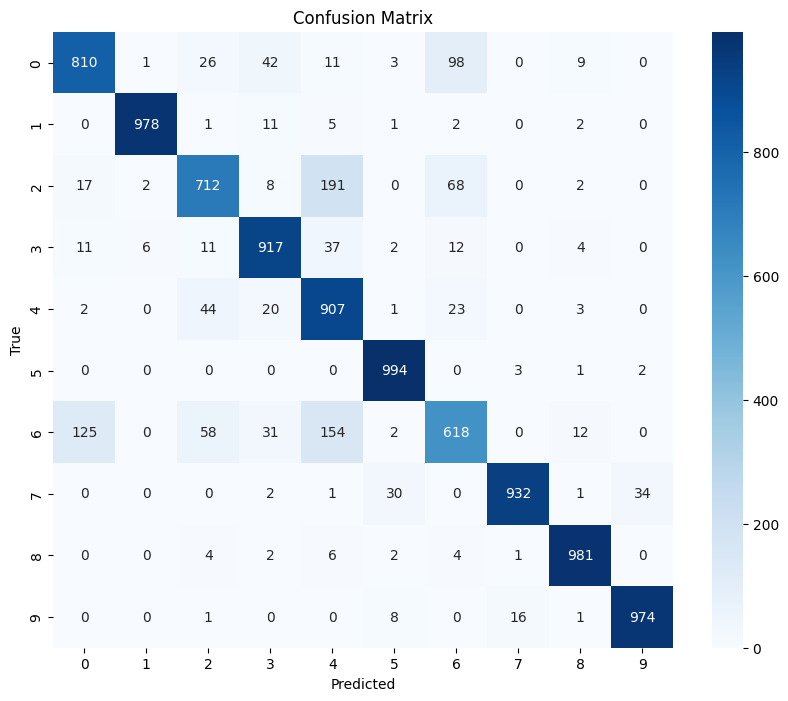

In [17]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on test data
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
# y_true = np.argmax(y_test, axis=1)  # Corrected here
y_true = y_test


# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))

# Confusion matrix
conf_mat = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


In [18]:
print(y_pred_classes.shape)
print(y_test.shape)


(10000,)
(10000,)


# Actual Vs Predicted

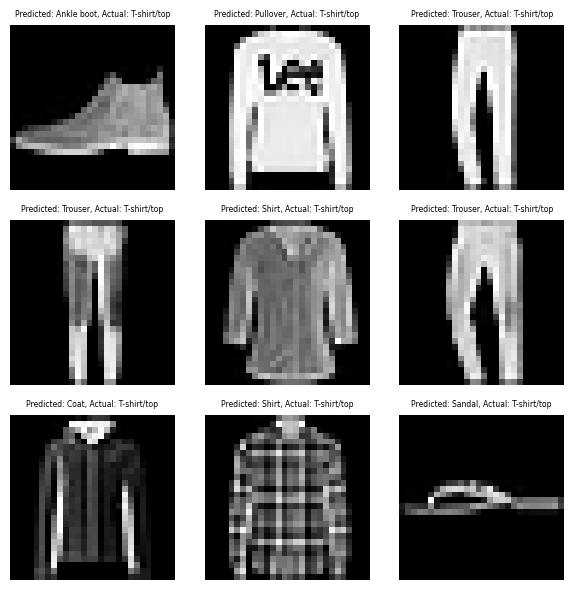

In [19]:

plt.figure(figsize=(6, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"Predicted: {clothes_names[y_pred_classes[i]]}, Actual: {clothes_names[np.argmax(y_test[i])]}",
          fontsize=5.5)


    plt.axis('off')
plt.tight_layout()
plt.show()